In [46]:
import os
import torch
from conditional_rate_matching.models.metrics.paths_metrics import map_proportion_nist
from conditional_rate_matching.models.metrics.paths_metrics import av_number_of_flips_in_path
from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.utils.plots.images_plots import  mnist_noise_bridge
from conditional_rate_matching import results_path
from conditional_rate_matching import plots_path
from conditional_rate_matching.models.metrics.fid_metrics import load_classifier

def test_mnist_paths_flip_average(experiment_dir, device, max_number_of_batches):
    
    """
    av flips
    """
    crm = CRM(experiment_dir=experiment_dir, device=torch.device(device))
    av_flip = av_number_of_flips_in_path(crm, max_number_of_batches=max_number_of_batches)
    print(av_flip)

def test_mnist_maps_batch_example(experiment_dir, 
                                  device, 
                                  class_label=1,
                                  number_of_images_to_see=3, 
                                  steps_of_noise_to_see=20):
    """
    just one sample from source and classification
    """
    from conditional_rate_matching.utils.data.samples import select_label
    device = torch.device(device)
    crm = CRM(experiment_dir=experiment_dir, device=device)
    classifier = load_classifier(crm.config.data1.dataset_name,device)
    selected_images = select_label(crm.dataloader_0,
                                   label_to_see=class_label,
                                   sample_size=number_of_images_to_see,
                                   train=True)
    num_images_encountered = selected_images.size(0)
    crm.config.pipeline.num_intermediates = steps_of_noise_to_see
    x_f, x_hist, ts = crm.pipeline(100, return_intermediaries=True, train=False, x_0=selected_images)
    
    mnist_noise_bridge(x_hist, ts, steps_of_noise_to_see, min(num_images_encountered,number_of_images_to_see),
                       save_path=None)
    y = classifier(x_f.view(-1, 1, 28, 28))
    y = torch.argmax(y, dim=1)
    print(y)

def test_mnist_maps_proportions(experiment_dir, device, max_number_of_batches):
    device = torch.device(device)
    crm = CRM(experiment_dir=experiment_dir, device=device)
    label_to_label_histograms = map_proportion_nist(crm, device, max_number_of_batches=max_number_of_batches)
    print(label_to_label_histograms)

1000it [01:34, 10.59it/s]


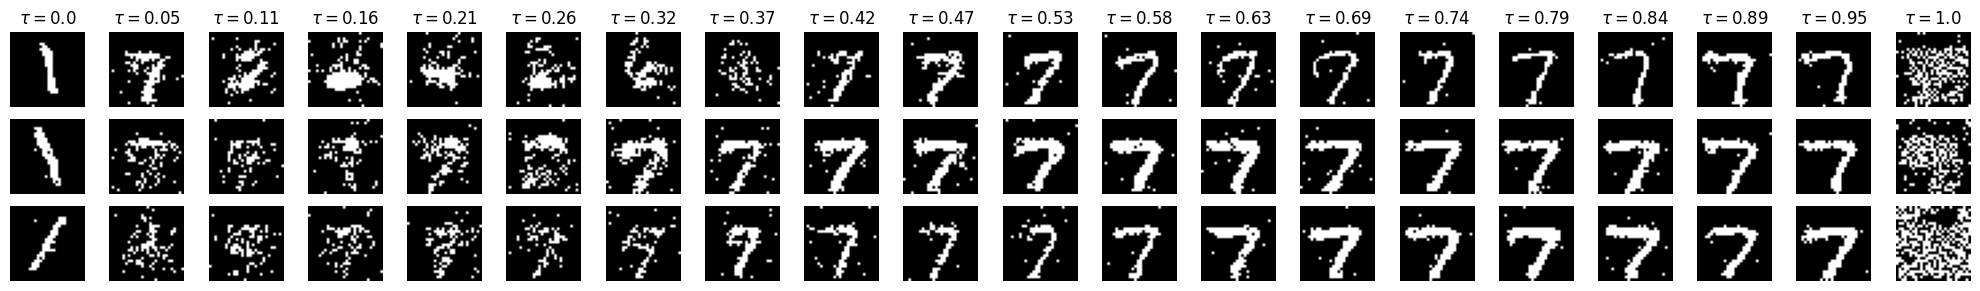

tensor([7, 7, 9])


In [37]:
experiment_dir = '/home/df630/conditional_rate_matching/results/crm/emnist_2_mnist_bridge/emnist_to_mnist_unet_128x128_0.01/run'
device = 'cpu'
test_mnist_maps_batch_example(experiment_dir, device, class_label=12, number_of_images_to_see=3, steps_of_noise_to_see=20)

1000it [01:07, 14.73it/s]


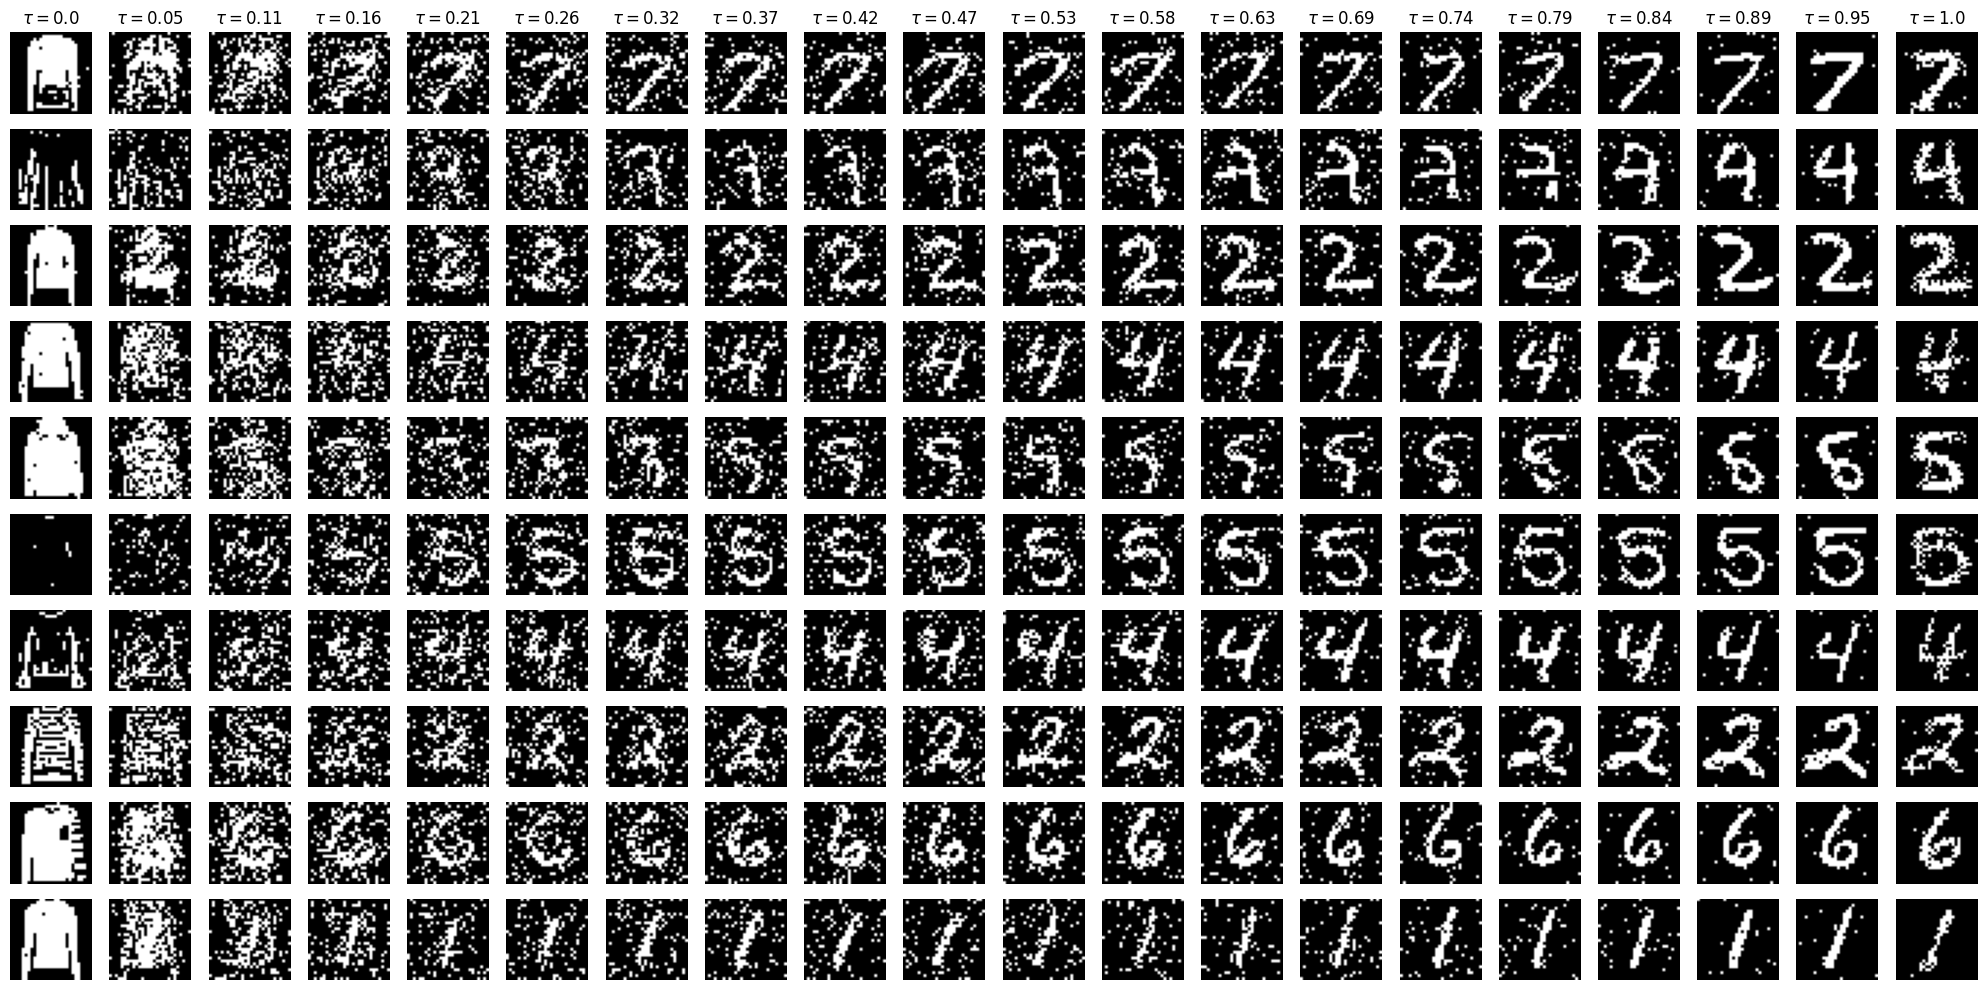

tensor([7, 4, 2, 4, 5, 5, 4, 2, 6, 1])


In [22]:
experiment_dir = '/home/df630/conditional_rate_matching/results/crm/fashion_to_mnist_unet_128x128_0.1/run'
device = 'cpu'
test_mnist_maps_batch_example(experiment_dir, 
                              device, 
                              class_label=2,
                              number_of_images_to_see=10, 
                              steps_of_noise_to_see=20)

1000it [01:08, 14.54it/s]


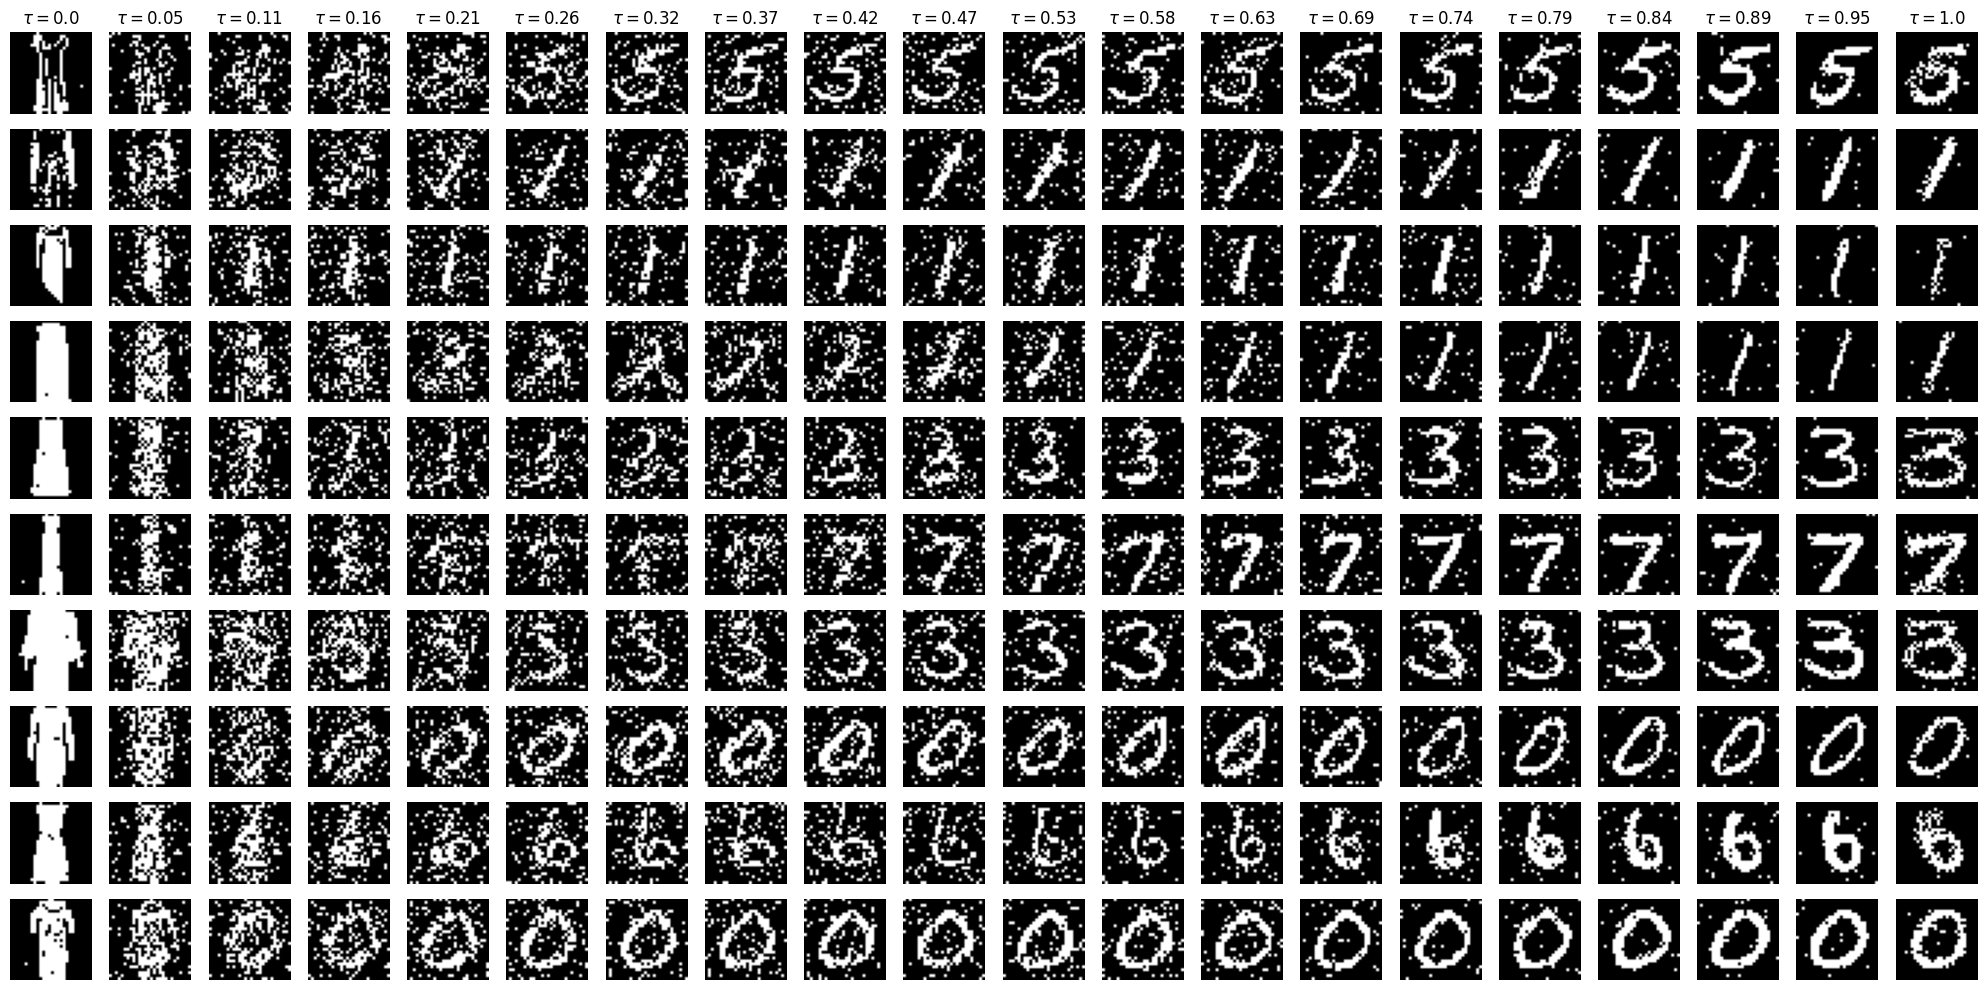

tensor([5, 1, 1, 1, 3, 7, 3, 0, 5, 0])


In [23]:
experiment_dir = '/home/df630/conditional_rate_matching/results/crm/fashion_to_mnist_unet_128x128_0.1/run'
device = 'cpu'
test_mnist_maps_batch_example(experiment_dir, 
                              device, 
                              class_label=3,
                              number_of_images_to_see=10, 
                              steps_of_noise_to_see=20)

In [ ]:
experiment_dir = '/home/df630/conditional_rate_matching/results/crm/fashion_to_mnist_unet_128x128_0.1/run'
device = 'cpu'
test_mnist_maps_batch_example(experiment_dir, 
                              device, 
                              class_label=3,
                              number_of_images_to_see=10, 
                              steps_of_noise_to_see=20)

In [50]:
experiment_dir = '/home/df630/conditional_rate_matching/results/crm/fashion_2_mnist_bridge/fashion_to_mnist_unet_128x128_1/run'
device = 'cpu'
test_mnist_paths_flip_average(experiment_dir, device, 128)

2it [00:06,  3.31s/it]